In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings 

In [2]:
df=pd.read_csv('data/raw.csv')

In [3]:
df.head()


,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [5]:
X= df.drop(columns=['Marks'],axis=1)

In [6]:
X.head()

,number_courses,time_study
0,3,4.508
1,4,0.096
2,4,3.133
3,6,7.909
4,8,7.811


In [7]:
y = df['Marks']

In [8]:
y

0     19.202
1      7.734
2     13.811
3     53.018
4     55.299
       ...  
95    19.128
96     5.609
97    41.444
98    12.027
99    32.357
Name: Marks, Length: 100, dtype: float64

In [13]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)






In [14]:
X = preprocessor.fit_transform(X)

In [15]:
X

array([[-1.27897041,  0.18248894],
       [-0.72046805, -1.68619512],
       [-0.72046805, -0.39988653],
       [ 0.39653668,  1.6229682 ],
       [ 1.5135414 ,  1.58146071],
       [ 0.39653668, -0.36684996],
       [-1.27897041,  0.84110266],
       [-0.16196569, -0.28129371],
       [-0.72046805,  0.14098145],
       [-1.27897041,  0.8876927 ],
       [-1.27897041,  1.38747674],
       [ 0.95503904, -1.54769564],
       [ 0.95503904,  0.05966066],
       [-1.27897041,  0.08337923],
       [-1.27897041, -0.49518433],
       [-0.72046805,  0.07744958],
       [-0.16196569,  0.6954029 ],
       [ 1.5135414 ,  0.84830294],
       [ 0.39653668,  1.53910613],
       [ 1.5135414 , -0.04241388],
       [-0.72046805,  0.27778675],
       [ 0.39653668,  0.86778604],
       [-0.16196569, -0.85816308],
       [ 0.95503904,  0.33793025],
       [-0.72046805, -0.18726654],
       [-1.27897041, -1.13092658],
       [ 0.95503904, -1.51169425],
       [ 1.5135414 ,  0.12742799],
       [-0.16196569,

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((80, 2), (20, 2))

In [17]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [19]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
   # "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 3.4587
- Mean Absolute Error: 3.0517
- R2 Score: 0.9344
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3.7684
- Mean Absolute Error: 3.0793
- R2 Score: 0.9460


Lasso
Model performance for Training set
- Root Mean Squared Error: 3.7065
- Mean Absolute Error: 3.1841
- R2 Score: 0.9246
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.7249
- Mean Absolute Error: 3.9420
- R2 Score: 0.9151


Ridge
Model performance for Training set
- Root Mean Squared Error: 3.4620
- Mean Absolute Error: 3.0472
- R2 Score: 0.9342
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 3.8801
- Mean Absolute Error: 3.1756
- R2 Score: 0.9427


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 1.9674
- Mean Absolute Error: 1.3139
- R2 Score: 0.9788
-----------------------

In [20]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
6,CatBoosting Regressor,0.997480
5,Random Forest Regressor,0.991502
7,AdaBoost Regressor,0.988738
4,Decision Tree,0.984525
3,K-Neighbors Regressor,0.972690
0,Linear Regression,0.945994
2,Ridge,0.942744
1,Lasso,0.915098


In [21]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 94.60


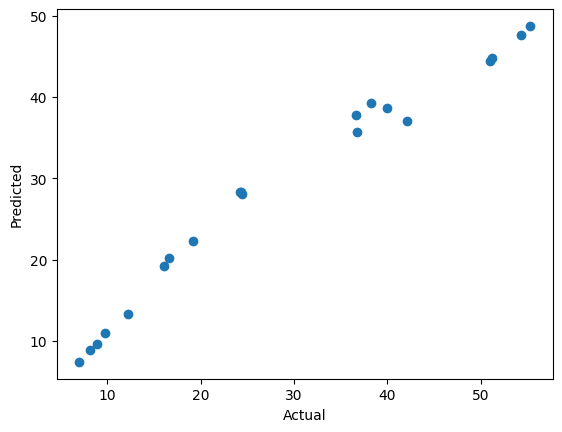

In [22]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

In [23]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
83,16.106,19.272783,-3.166783
53,36.653,37.760357,-1.107357
70,16.606,20.187794,-3.581794
45,8.924,9.656709,-0.732709
44,9.742,10.975082,-1.233082
39,51.142,44.812006,6.329994
22,12.209,13.348110,-1.139110
80,54.321,47.624472,6.696528
10,42.036,37.015670,5.020330
0,19.202,22.307385,-3.105385
